# Polynomial regression - overfitting and underfitting

In [52]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
samples = 100
X = np.random.uniform(-3,3, (samples, 1))
f = lambda x: x**2 + 0.5*x + 3  # second degree polynomial.
y = f(X) + np.random.randn(samples,1) # adds an epsilon standard normally distributed.
print(X.shape)

y.shape


(100, 1)


(100, 1)

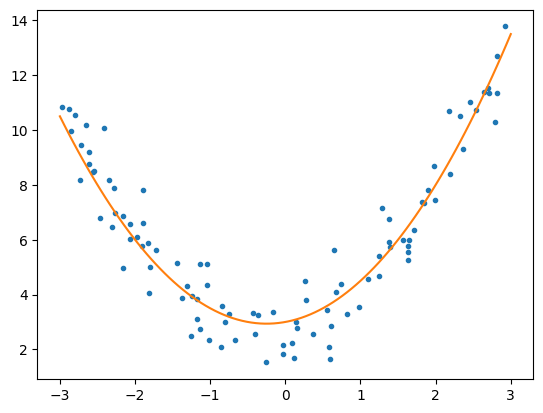

In [53]:
x = np.linspace(-3,3,100).reshape(100,1)


plt.plot(X, y, ".")
plt.plot(x, f(x))

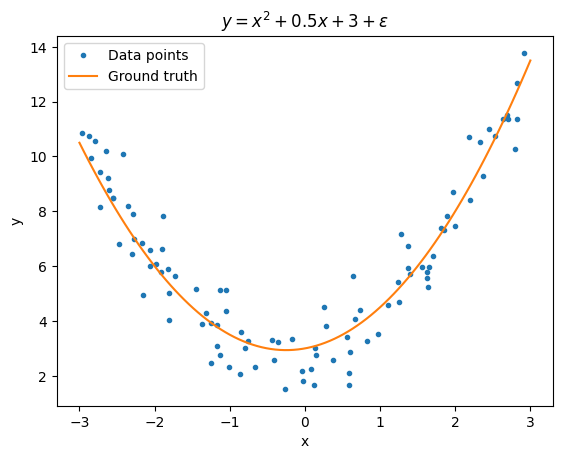

In [54]:
def draw_data():
    fig, ax = plt.figure(), plt.axes()
    ax.plot(X,y, ".", label="Data points")
    x = np.linspace(-3,3,100).reshape(100,1)
    ax.plot(x, f(x), label="Ground truth")
    ax.set(title = r"$y = x^2+0.5x+3+\epsilon$", xlabel="x", ylabel="y")
    ax.legend()

    return ax

draw_data();

## Polynomial regression

### Feature engineering

- constructed poly artificially.

In [55]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_instance = PolynomialFeatures(degree=2, include_bias=False) # Todo check why I chose not to include bias.

polynomial_features = polynomial_instance.fit_transform(X)
polynomial_features[:5], X[:5], .75**2, 2.7**2 # What is this?

(array([[-0.75275929,  0.56664654],
        [ 2.70428584,  7.3131619 ],
        [ 1.39196365,  1.93756281],
        [ 0.59195091,  0.35040587],
        [-2.06388816,  4.25963433]]),
 array([[-0.75275929],
        [ 2.70428584],
        [ 1.39196365],
        [ 0.59195091],
        [-2.06388816]]),
 0.5625,
 7.290000000000001)

In [56]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(polynomial_features, y)
model.coef_ # beta_1, beta_2

array([[0.43366893, 1.06456263]])

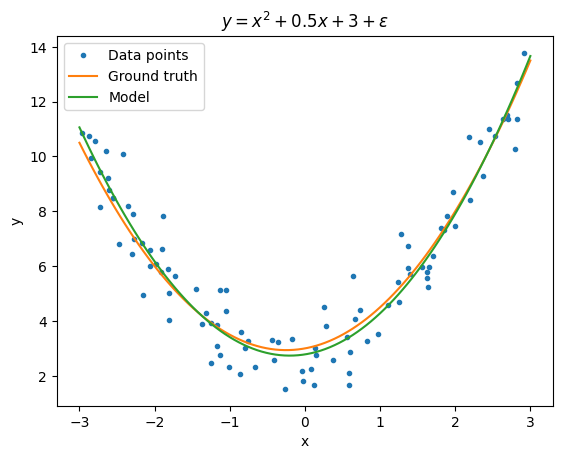

In [57]:
x = np.linspace(-3,3,samples).reshape(-1,1) #test data in this case
x_polynomial_features = polynomial_instance.transform(x)

y_pred = model.predict(x_polynomial_features)

ax = draw_data()
ax.plot(x, y_pred, label="Model")
ax.legend()

## Underfitting

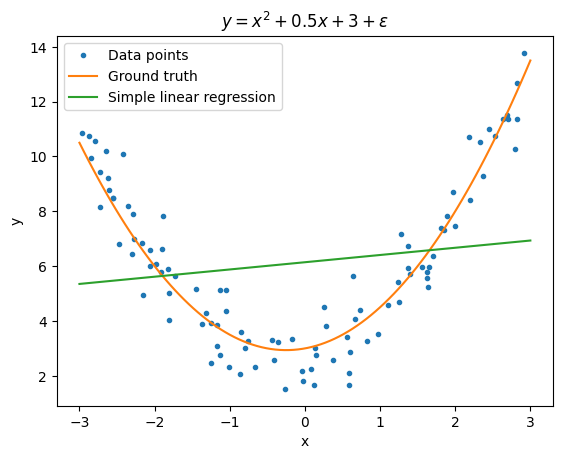

In [60]:
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(x)

ax = draw_data()
ax.plot(x, y_pred, label = "Simple linear regression") # Underfitting
ax.legend();

## Overfitting

X_features.shape=(100, 30)


[Text(0.5, 1.0, 'Overfitted, the model is to complex'), (-5.0, 15.0)]

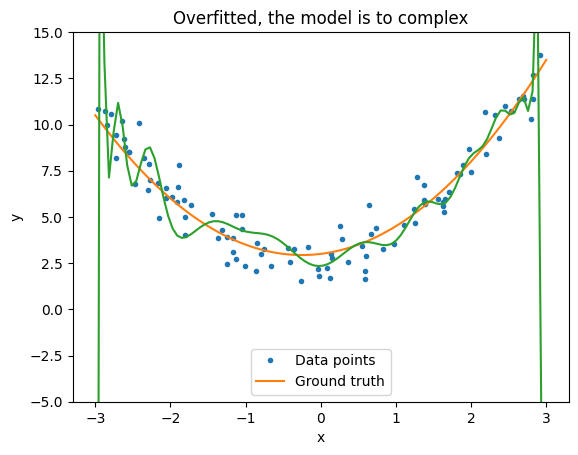

In [69]:
polynomial_instance = PolynomialFeatures(30, include_bias=False)
X_features = polynomial_instance.fit_transform(X)
print(f"{X_features.shape=}")

model = LinearRegression()
model.fit(X_features, y)

x_polynomial_features = polynomial_instance.transform(x)

y_pred = model.predict(x_polynomial_features)

ax = draw_data()
ax.plot(x, y_pred)
ax.set(title = "Overfitted, the model is to complex", ylim= [-5,15])
# can't generalize well


# Choose a model
- Need to find a model that suits our data.

In [72]:
#Simulation:
samples = 10000 # large simulation

X = np.random.uniform(-3,3, (samples, 1))
f = lambda x: x**4 + x**2 + 0.5*x + 3
y = f(X) + np.random.randn(samples,1)

X.shape, y.shape

((10000, 1), (10000, 1))

## Train|val|test split
- val = validation split. needs when we have a hyperparameter. As in our degree.

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

X_train.shape, X_test.shape,y_train.shape, y_test.shape, X_val.shape, y_val.shape

((6700, 1), (1089, 1), (6700, 1), (1089, 1), (2211, 1), (2211, 1))

## Elbow

In [80]:
from sklearn.metrics import mean_squared_error

RMSE_val = []

for degree in range(1,100):
    model_poly = PolynomialFeatures(degree, include_bias=False) # We have include_bias as false because Linear regression already has a intercept.
    train_features = model_poly.fit_transform(X_train) # feature engineering on training data.
    val_features = model_poly.transform(X_val) # feature engineering on validation data.
    model_linear_regression = LinearRegression()

    model_linear_regression.fit(train_features, y_train)

    y_pred_val = model_linear_regression.predict(val_features)

    RMSE_val.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))


Text(0.5, 1.0, 'RMSE on validation data for degrees of polynomial')

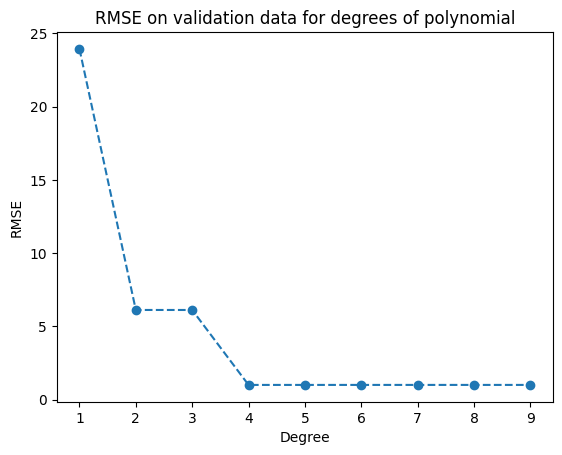

In [91]:
plt.plot(range(1,10), RMSE_val[:9], "o--")
plt.xlabel("Degree") #elbow plot. 
plt.ylabel("RMSE")
plt.title("RMSE on validation data for degrees of polynomial")
# From below plot we see that we should use 4 degrees of freedom for the best model..?